## Data Distribution

Data Distribution refers to the way in which the values of a dataset are spread or distributed across different values or ranges.
It provides a mathematical description of the data's behavior, indicating where most data points are concentrated and how they are spread out.


## Normal Distribution (Gaussian Distribution):
   - Shape: Bellshaped and symmetric.
   - Characteristics: Mean, median, and mode are all equal. It’s described by its mean (μ) and standard deviation (σ).
   - Example: Heights of people, test scores.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, t, norm, f

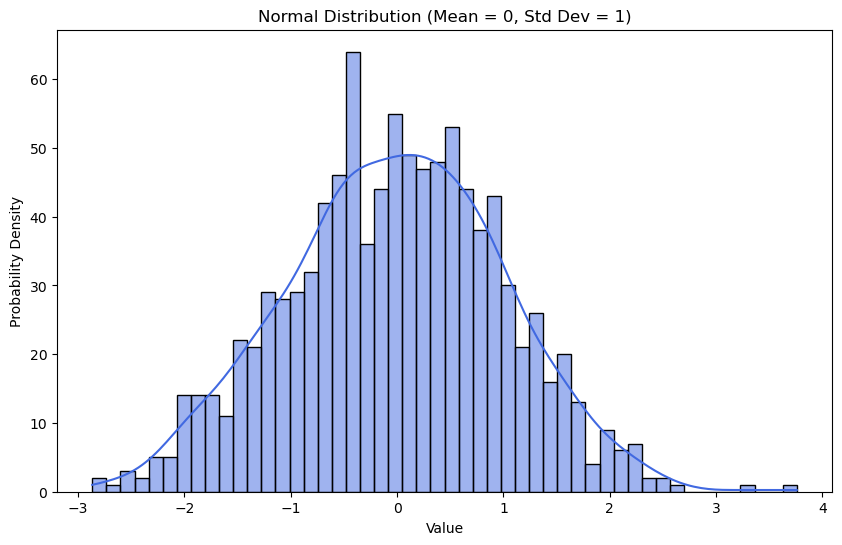

In [60]:
mean = 0  
std_dev = 1 
num_samples = 1000 

# Rrandom samples from a normal distribution
data = np.random.normal(mean, std_dev, num_samples)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True, color="royalblue")

# Add labels and title
plt.title(f'Normal Distribution (Mean = {mean}, Std Dev = {std_dev})')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Show the plot
plt.show()


## Uniform Distribution:

   - All values in the range have an equal probability of occurring.
   - It has a flat shape (constant probability).
   - Examples: Rolling a fair die, choosing random numbers between 0 and 1.

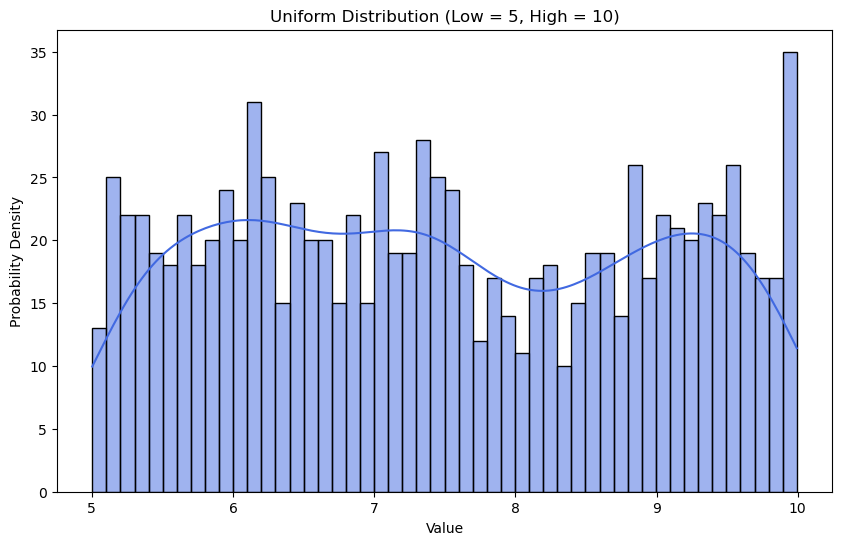

In [61]:
# Parameters for the uniform distribution
low = 5
high = 10 
num_samples = 1000 

# Generate random samples from a uniform distribution
data = np.random.uniform(low, high, num_samples)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True, color="royalblue")

# Add labels and title
plt.title(f'Uniform Distribution (Low = {low}, High = {high})')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Show the plot
plt.show()


## Binomial Distribution?

The **Binomial Distribution** models the number of successes in a fixed number of independent trials, each with the same probability of success.

#### Conditions:
1. Fixed number of trials (n)
2. Each trial is independent
3. Only two possible outcomes (Success or Failure)
4. Constant probability of success (p)

#### PMF Formula:
\[
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n-k}
\]
Where:
- \( n \) = number of trials
- \( k \) = number of successes
- \( p \) = probability of success on a single trial
- \( \binom{n}{k} \) = combinations = n choose k


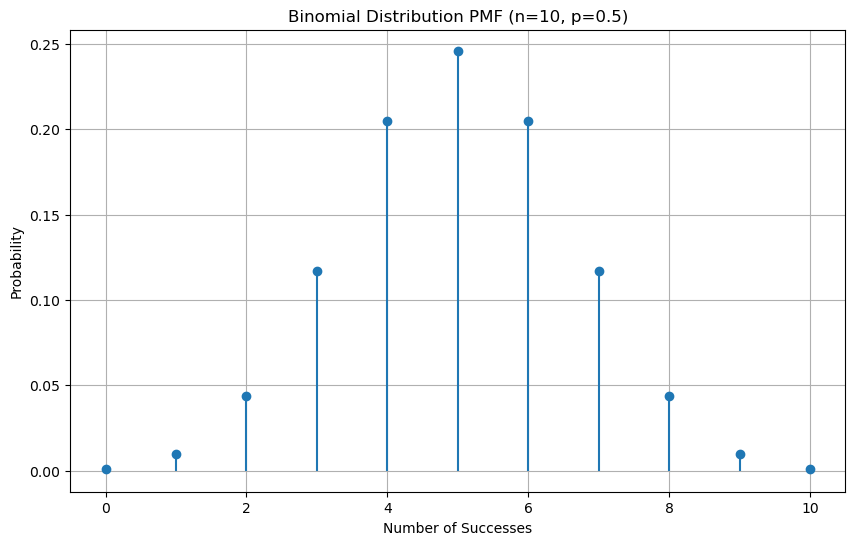

In [62]:
# Parameters
n = 10      # Number of trials
p = 0.5     # Probability of success
x = np.arange(0, n+1)  # All possible outcomes from 0 to n

# PMF values
pmf_vals = binom.pmf(x, n, p)

# Plot
plt.figure(figsize=(10, 6))
plt.stem(x, pmf_vals, basefmt=" ")
plt.title(f"Binomial Distribution PMF (n={n}, p={p})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

## What is t-Distribution?

The **t-distribution** is a type of probability distribution that is symmetric and bell-shaped like the normal distribution, but with heavier tails.

#### When to Use:
- Sample size is small (**n < 30**)
- Population standard deviation is **unknown**
- Data is approximately **normally distributed**

#### Formula:
\[
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
\]

Where:
- \( \bar{x} \) = sample mean  
- \( \mu \) = population mean  
- \( s \) = sample standard deviation  
- \( n \) = sample size

#### Properties of t-Distribution

- Symmetric and bell-shaped, like the normal distribution
- **Heavier tails** → more probability in the tails than normal
- Approaches standard normal distribution as degrees of freedom (df) → ∞
- Used in:
  - Confidence intervals of means
  - Hypothesis testing (t-tests)
- The **t-distribution** is essential for working with small samples and unknown population standard deviations.
- It looks similar to a normal distribution but has thicker tails.
- As the sample size increases, the t-distribution becomes closer to the normal distribution.
- It's commonly used in confidence intervals and hypothesis testing.



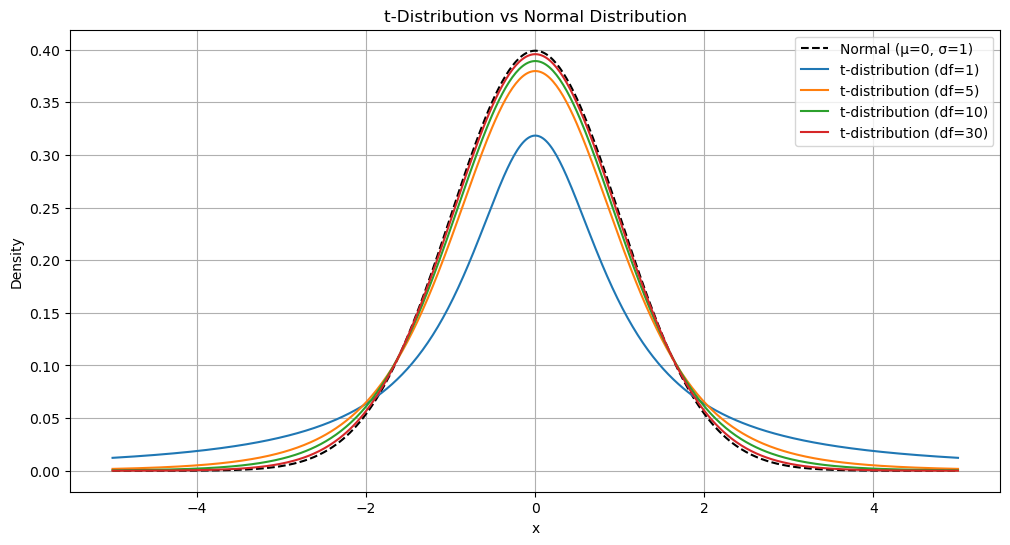

In [63]:
x = np.linspace(-5, 5, 500)

plt.figure(figsize=(12, 6))

# Standard normal distribution
plt.plot(x, norm.pdf(x), label='Normal (μ=0, σ=1)', color='black', linestyle='--')

# t-distributions for different degrees of freedom
for df in [1, 5, 10, 30]:
    plt.plot(x, t.pdf(x, df), label=f't-distribution (df={df})')

plt.title("t-Distribution vs Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## What is F-Distribution?

The **F-distribution** is a continuous probability distribution used primarily to **compare variances** between two populations.

It is defined as the ratio of two chi-square distributions:
\[
F = \frac{(X_1 / d_1)}{(X_2 / d_2)}
\]
Where:
- \( X_1 \sim \chi^2(d_1) \)
- \( X_2 \sim \chi^2(d_2) \)
- \( d_1, d_2 \) are degrees of freedom for numerator and denominator

It is **right-skewed** and used in:
- **ANOVA (Analysis of Variance)**
- **F-tests** for comparing variances

#### Properties of F-Distribution

- Not symmetric (skewed to the right)
- Defined only for **positive values**
- Depends on two parameters: degrees of freedom **d₁ (numerator)** and **d₂ (denominator)**
- Mean exists if \( d_2 > 2 \); variance exists if \( d_2 > 4 \)



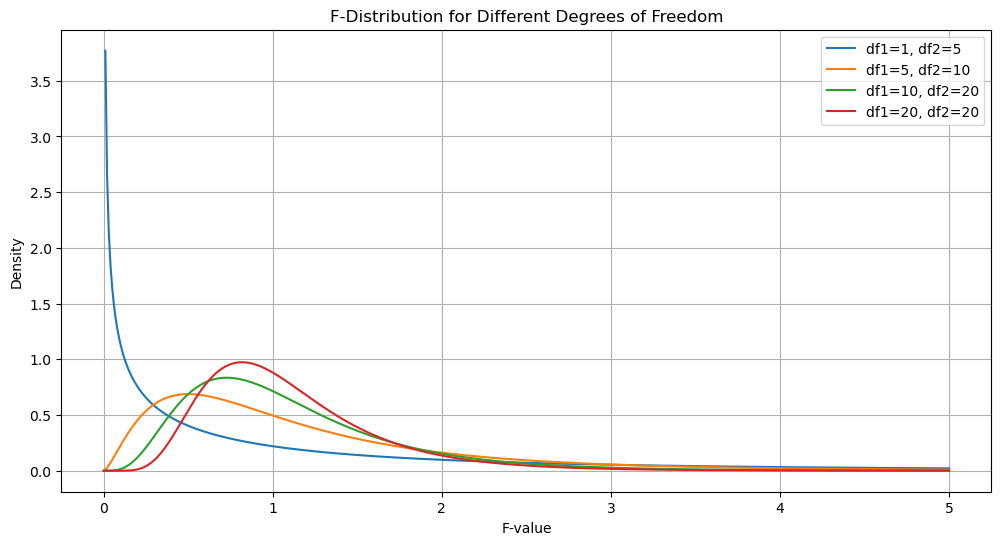

In [64]:
x = np.linspace(0, 5, 500)

plt.figure(figsize=(12, 6))

# Plot F-distribution for different df combinations
for dfn, dfd in [(1, 5), (5, 10), (10, 20), (20, 20)]:
    y = f.pdf(x, dfn, dfd)
    plt.plot(x, y, label=f'df1={dfn}, df2={dfd}')

plt.title("F-Distribution for Different Degrees of Freedom")
plt.xlabel("F-value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
